# Figure S3A

In [1]:
%reload_ext autoreload
%autoreload 2

from analysis.peak_detect import *
from analysis.ramp_score import *
import numpy as np 
from analysis.sparse_analysis import *
import pickle
import scipy.optimize as optimize
import scipy
import itertools
import os
from utils import getWrappedSubplots
import matplotlib as mpl

### Make some sample curves

In [2]:
def plotCurves(D,title=None,ylim=None,dpi=100):
    numRow = D.shape[0]//5+1
    fig = plt.figure(figsize=(2.5*5,numRow*2.5),dpi=dpi)
    for i in range(D.shape[0]):
        ax = fig.add_subplot(numRow,5,i+1)
        ax.plot(D[i,:])
        ax.set_title(i)
        if ylim:
            ax.set_ylim(ylim)
        if title:
            ax.set_title(title[i])
    
    plt.tight_layout()
    return fig

In [3]:
x = np.arange(100)
curve_list = np.zeros((21,len(x)))
np.random.seed(0)

def addNoise(x, factor):
    return x + np.random.normal(size=(x.shape[0],), scale=factor*np.std(x))


curve_list[0,:]= x
curve_list[1,:] = np.flip(x)
curve_list[2,:] = np.sin(np.pi*x/100)
curve_list[3,:] = np.sin(np.pi*x/200)
curve_list[4,:] = np.cos(np.pi*x/200)
curve_list[5,:] = x**4/10**4
curve_list[6,:] = np.flip(x**4)/10**4
curve_list[7,:] = np.random.randn(100)
curve_list[8,:] = 10*np.random.randn(100)
curve_list[9,:] = 4*np.ones((100,))
curve_list[10,:] = np.concatenate([np.linspace(0,100,80),np.linspace(100,0,20)])
curve_list[11,:] = np.flip(curve_list[10,:])
curve_list[12,:] = np.concatenate([np.linspace(100,20,80),np.linspace(20,100,20)])
curve_list[13,:] = np.flip(curve_list[12,:])
curve_list[14,:] = np.concatenate([np.linspace(90,90,20),np.linspace(90,20,60),np.linspace(20,100,20)])
curve_list[15,:] = np.flip(curve_list[14,:])
curve_list[16,:] = 1 - curve_list[15,:]
curve_list[17,:] = 1 - curve_list[14,:]
curve_list[18,:] = np.concatenate([np.zeros((45,)),np.linspace(20,90,5),np.linspace(90,20,5),np.zeros((45,))])
# curve_list[19,:] = np.concatenate([np.zeros((20,)),np.linspace(20,90,5),np.linspace(90,20,5),np.zeros((70,))])
curve_list[19,:] = addNoise(curve_list[0,:],0.8)
curve_list[20,:] = addNoise(curve_list[1,:],0.8)


### Figure 3A Ramp score example

C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarni

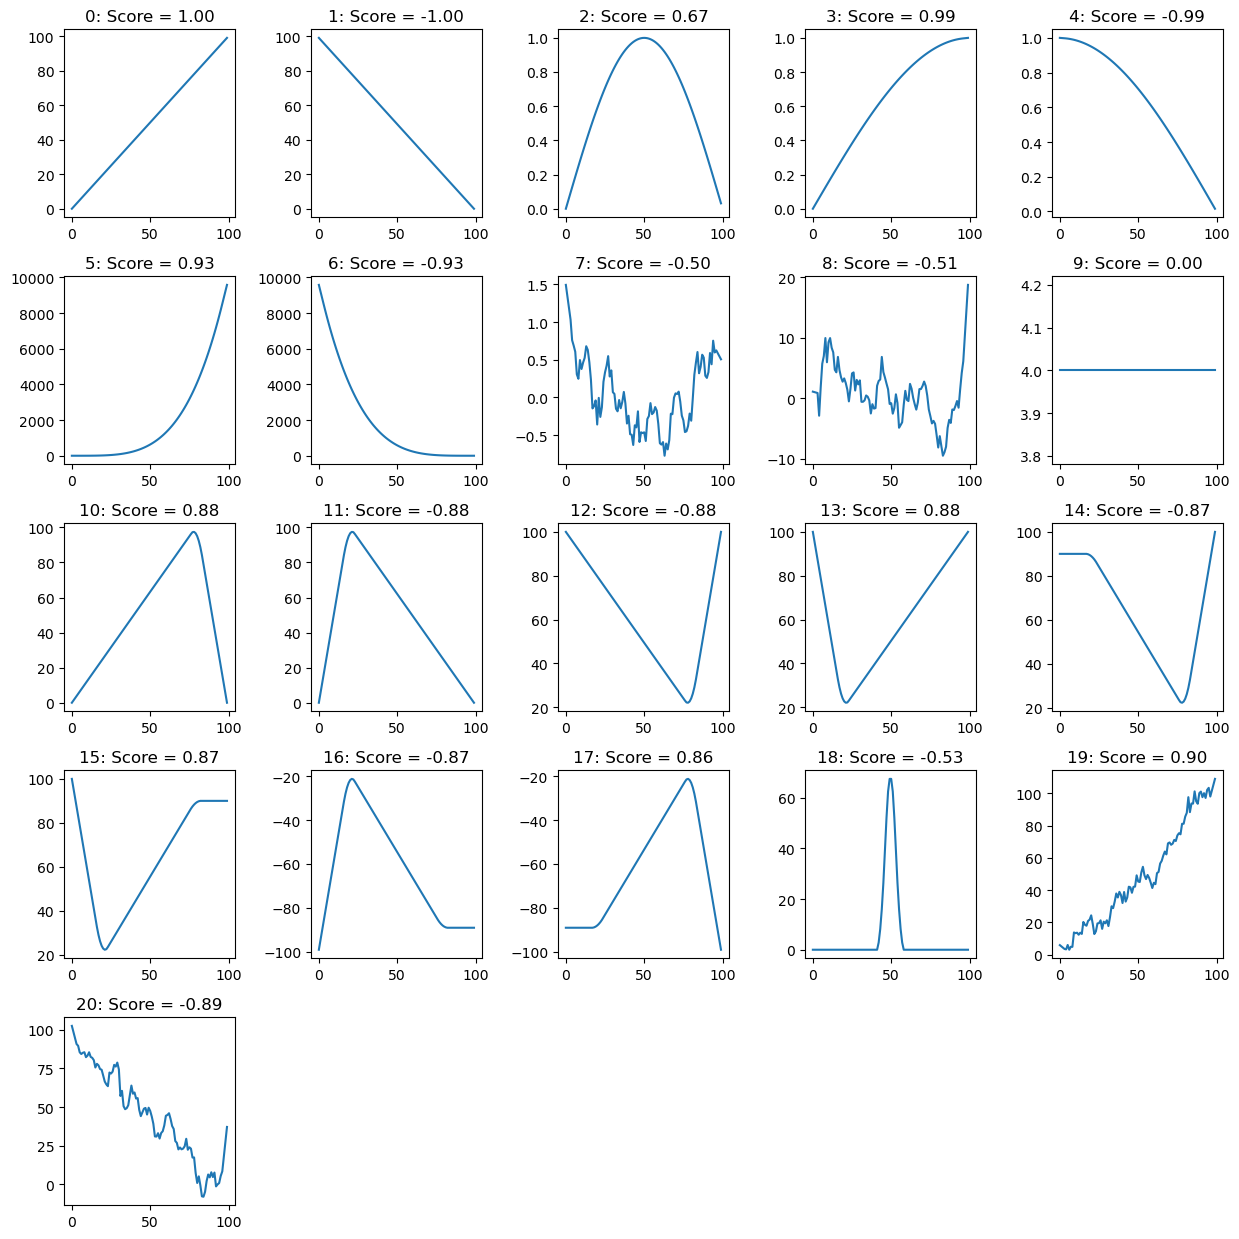

In [4]:
titles = []
curves = []
curve2plot = curve_list
for i in range(curve2plot.shape[0]):
    (score,best_bp,meanCurve,normCurve) = findBestRampScore2(curve2plot[i,:],x,x)
    titles.append(f'{i}: Score = {score:.2f}')
    curves.append(meanCurve)
    
# plotCurves(curve_list,titles);
plotCurves(np.stack(curves),titles);

[0, 99]
[0, 99]
[2, 2]
[0, 78]
[2, 78]
[0, 99]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\teristam\Anaconda3\envs\glm_mec_model\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
[0, 99]
[0, 99]
[0, 67]
[41, 99]


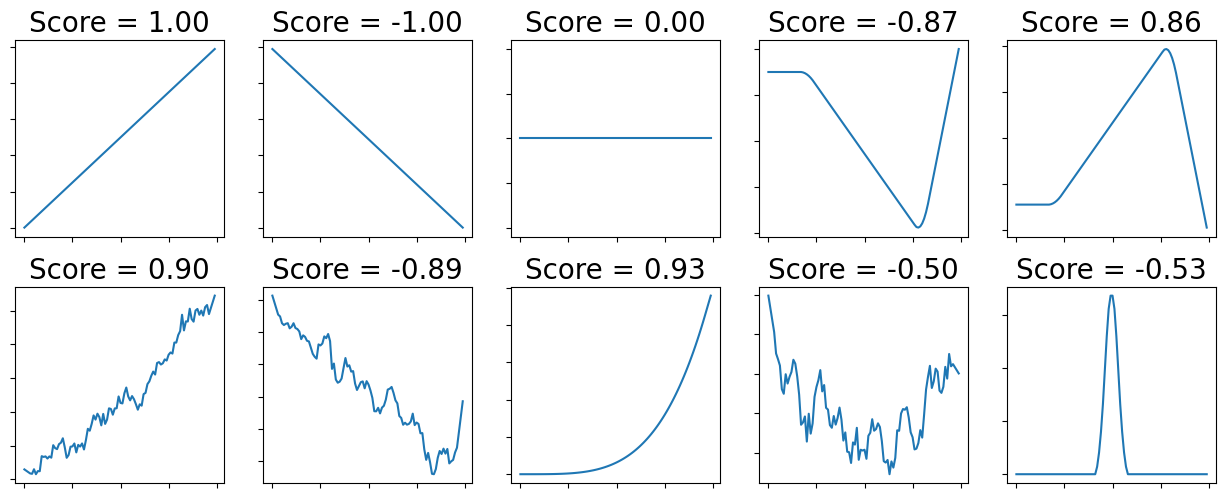

In [5]:
titles = []
curves = []
curve2plot=curve_list[[0,1,9,14,17,19,20,5,7,18],:]
# curve2plot = curve_list
for i in range(curve2plot.shape[0]):
    (score,best_bp,meanCurve,normCurve) = findBestRampScore2(curve2plot[i,:],x,x)
    print(best_bp)
    titles.append(f'Score = {score:.2f}')
    curves.append(meanCurve)

# plotCurves(curve_list,titles);

params = {
    'xtick.labelbottom': False,
    'ytick.labelleft': False , 
    'figure.dpi':300,
    'axes.titlesize': 20
}

mpl.rcParams.update(params)
# plt.style.use('large_label.mplstyle')

plotCurves(np.stack(curves),titles);
plt.savefig('paper_figures/S3A.pdf')

In [11]:
x = curve2plot[-1,41:99]
np.corrcoef(x,np.arange(len(x)))

array([[ 1.      , -0.488777],
       [-0.488777,  1.      ]])